<a href="https://colab.research.google.com/github/sa1manhaidr/PAK-VS-INDIA-Twitter-Sentiment-Analysis/blob/main/pkvsind.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING REQUIRED LIBRARIES 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from IPython.display import clear_output
import pandas as pd
import seaborn as sns
import re, nltk
nltk.download('punkt')
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score , precision_score
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import f1_score
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
!pip install lime 
from lime import lime_tabular
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import  accuracy_score, make_scorer
from tensorflow.keras.layers import Embedding
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Dense, Dropout
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('vader_lexicon')
from nltk.corpus import words

import re
import nltk
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier

from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import  TfidfVectorizer
from wordcloud import WordCloud, ImageColorGenerator
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MiniBatchKMeans
clear_output()





*READING* THE DATA 


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/INDvsPAK.csv", encoding ='latin1')
#print(data.head())


In [ ]:
data['rendered_text'] = data.loc[:, 'text'] #copying original tweet column for cleaning purpose.
data['rendered_text'].head()


0    Thats Why I play ð Cricket &amp; I love Cri...
1    Focused and calmer. #HardikPandya ð¥\n\n#IND...
2    @Rautparody61 Congratulations ð Team india ...
3    IND Vs PAK Asia Cup 2022: Pakistan à¤à¥ à¤à...
4    à¤¬à¤¾à¤ª à¤¤à¥ à¤¬à¤¾à¤ª à¤¹à¥ à¤¹à¥à¤¤à¤¾...
Name: rendered_text, dtype: object

TEXT CLEANING 


In [ ]:
# importing required cleaning methods
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))
cntwords=['vs','india','pak','pakistan',]
wd = set(nltk.corpus.words.words()+ (cntwords))
wordnet_lemmatizer = WordNetLemmatizer()

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', ' ', text) #For removing punctuation
    text = re.sub('<.*?>+', ' ', text) 
    text = re.sub('@[A-Za-z0-9_]+', ' ', text) #for removing characters with @ tag
    text = re.sub('#[A-Za-z0-9_]+', ' ', text) #for removing characters with # tag
    text = re.sub('https?://\S+|www\.\S+', ' ', text) # for removing weblinks
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text) #for removing spaces
    text = re.sub('\n', ' ', text) # for removing new line space 
    text = re.sub('\w*\d\w*', ' ', text) # for removing alphanumeric characters
    text = re.sub('[^A-Za-z0-9]',' ',text) #for removing character other than english words
    text = re.sub(' +',' ',text) # for treating spaces after cleaning 
    text= [w for w in nltk.wordpunct_tokenize(text) if w.lower() in wd or not w.isalpha() ] #tokenize each word in a tweet 
    text=" ".join(text) #combine changes with the initial text
    text = [word for word in text.split(' ') if word not in stopword] # for removeing stopwords (i.e. that , an , a , for, etc.)
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')] # for shortening word to their root , e.g. Sportsman to sport
    text=" ".join(text)
    text = [wordnet_lemmatizer.lemmatize(word) for word in text.split(' ')]## for shortening word to its Gerund , Eg. Studying to study 
    text=" ".join(text)
    

    return text
data["rendered_text"] = data["rendered_text"].apply(clean)
data.shape

(10001, 29)

Plotting Wordcloud to visualize cleaned text data 



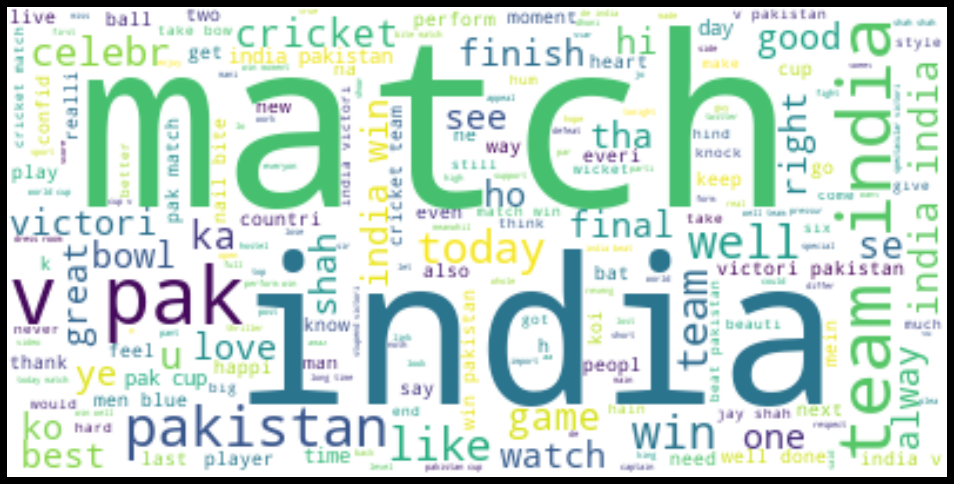

In [ ]:
text1 = " ".join(i for i in data.rendered_text)
from wordcloud import WordCloud, ImageColorGenerator
wordcloud = WordCloud(stopwords=stopword, background_color="white").generate(text1)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
data["rendered_text"]=data["rendered_text"].str.strip() # for removing spaces around initials 
data["rendered_text"].sample(10)


9245    huge respect shah doubt true gladiat well youn...
6056                                               beauti
2907    india close match india realli need think futu...
7563                                    street cheer team
424                                                   pak
2737     india india india team india spectacular victori
5372                                tweet month award goe
1780    blood pressur excess over real patient watch game
3944                                                     
8302                                brilliant match heart
Name: rendered_text, dtype: object

FOR VISUALIZING OUR DATASET

In [ ]:
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              10001 non-null  object 
 1   user_id           10001 non-null  float64
 2   text              10001 non-null  object 
 3   url               10001 non-null  object 
 4   renderedContent   10001 non-null  object 
 5   user_name         10001 non-null  object 
 6   user_followers    10001 non-null  int64  
 7   replyCount        10001 non-null  int64  
 8   retweet-count     10001 non-null  int64  
 9   likeCount         10001 non-null  int64  
 10  quoteCount        10001 non-null  int64  
 11  lang              10001 non-null  object 
 12  conversationId    10001 non-null  float64
 13  outlinks          1546 non-null   object 
 14  source            5380 non-null   object 
 15  is_retweet        0 non-null      float64
 16  quotedTweet       857 non-null    object

In [ ]:
#for Removing rows with only whitespaces and null values   
df.replace('',np.nan,inplace = True)
df = df[df['rendered_text'].notna()]
Word = list(set(words.words()))
df = df[df['rendered_text'].str.contains('|'.join(Word))]


In [ ]:
df.describe() #For Visualing data set values (i.e. min max)

,user_id,user_followers,replyCount,retweet-count,likeCount,quoteCount,conversationId,is_retweet,inReplyToTweetId
count,7.003000e+03,7.003000e+03,7003.000000,7003.000000,7003.000000,7003.000000,7.003000e+03,0.0,6.950000e+02
mean,1.563980e+18,1.468718e+04,0.665001,5.967585,48.943738,0.210481,1.563909e+18,NaN,1.559511e+18
std,1.583641e+13,2.631169e+05,15.112574,168.909936,1206.585271,8.859916,2.721913e+15,NaN,7.285221e+15
min,1.563960e+18,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.432300e+18,NaN,1.430000e+18
25%,1.563970e+18,1.600000e+01,0.000000,0.000000,0.000000,0.000000,1.563970e+18,NaN,1.560000e+18
50%,1.563970e+18,7.900000e+01,0.000000,0.000000,1.000000,0.000000,1.563970e+18,NaN,1.560000e+18
75%,1.563990e+18,4.510000e+02,0.000000,0.000000,3.000000,0.000000,1.563990e+18,NaN,1.560000e+18
max,1.564040e+18,1.288404e+07,1215.000000,12373.000000,78757.000000,732.000000,1.564040e+18,NaN,1.560000e+18


In [ ]:
df = df.drop_duplicates(subset='rendered_text', keep="first") #for removing duplicates 
df=df.reset_index(drop=True)
df.shape

(5470, 29)

In [ ]:
df.info() # for checking dataset null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5470 entries, 0 to 5469
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              5470 non-null   object 
 1   user_id           5470 non-null   float64
 2   text              5470 non-null   object 
 3   url               5470 non-null   object 
 4   renderedContent   5470 non-null   object 
 5   user_name         5470 non-null   object 
 6   user_followers    5470 non-null   int64  
 7   replyCount        5470 non-null   int64  
 8   retweet-count     5470 non-null   int64  
 9   likeCount         5470 non-null   int64  
 10  quoteCount        5470 non-null   int64  
 11  lang              5470 non-null   object 
 12  conversationId    5470 non-null   float64
 13  outlinks          806 non-null    object 
 14  source            2569 non-null   object 
 15  is_retweet        0 non-null      float64
 16  quotedTweet       461 non-null    object 


In [ ]:
out=df[["text","rendered_text"]] # exporting cleaned dataset 
out.to_csv('output.csv')


In [ ]:
df["rendered_text"].sample(10)

941     world shall unit honor dear may taken bodi sou...
1752                                            hum enjoy
246                                           check video
4273                                           full match
4047    victori men blue amaz bat display also phenome...
1408                     hilari cricket match thing cheer
1906                                      th celebr india
2118                     offici father pakistan top knock
3694      great perform shown good fight spirit main hero
5327       level confid u made match nail gave reveng win
Name: rendered_text, dtype: object

SENTIMENT ANALYZER 


In [ ]:
def get_polarity(s):
    return TextBlob(str(s)).sentiment.polarity
df['polarity'] = df['rendered_text'].apply(get_polarity)
df['polarity'].sample(10)

1991    0.0
444    -0.4
5391    0.0
2639    0.0
2534    0.0
2985    0.0
568     0.0
5438    0.0
742     0.0
5248    0.0
Name: polarity, dtype: float64

In [ ]:
#Filtering data based on their country only for sentiment scoring 
%matplotlib inline
pkslst=['pak','pakistan']
indlst=['ind','india']
df = df.loc[df['polarity'] != 0]
df.dropna(axis=1, inplace=True)
df.reset_index()
#df.set_index(pd.DatetimeIndex(df['date']), inplace=True)
data_ind = df[df['rendered_text'].str.contains('|'.join(indlst))] # data frame for India only tweets
data_ind = data_ind[data_ind['rendered_text'].str.contains('|'.join(pkslst)) == False]
data_pak = df[df['rendered_text'].str.contains('|'.join(pkslst))]   # data frame for Pakistan only tweets
data_pak = data_pak[data_pak['rendered_text'].str.contains('|'.join(indlst)) == False]

clear_output()

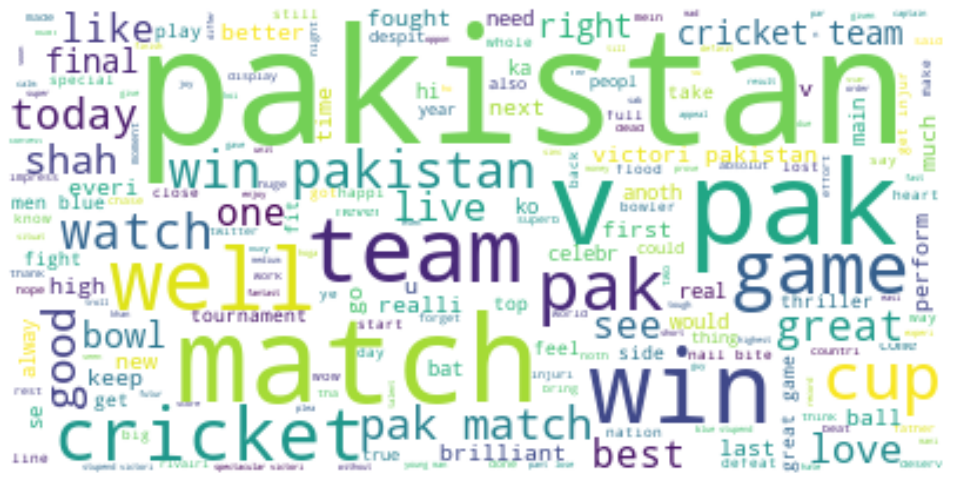

In [ ]:
text2 = " ".join(i for i in data_pak.rendered_text) #Wordcloud for Pakistan only tweets 
wordcloud = WordCloud(stopwords=stopword, background_color="white").generate(text2)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

PAK Sentiment score 

In [ ]:
#Sentiment scoring on Pakistan tweets 
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data_pak["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data_pak["rendered_text"]]
data_pak["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data_pak["rendered_text"]]
data_pak["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data_pak["rendered_text"]]
data_pak= data_pak[["rendered_text", "Positive", "Negative", "Neutral"]]


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
x = sum(data_pak["Positive"]) # Checking tweets performance on scoring 
y = sum(data_pak["Negative"])
z = sum(data_pak["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

#as seen below majority tweets are of neutral sentiment 

Neutral 🙂 


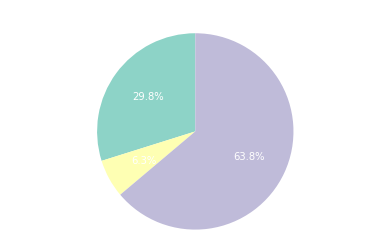

In [ ]:
pieLabels=["Winning","Loosing","Neutral"] # for visualizing Sentiment score for Pakistan tweets  

populationShare=[x,y,z]

figureObject, axesObject = plt.subplots()

axesObject.pie(populationShare,labels=pieLabels,autopct='%1.1f%%',startangle=90)
axesObject.title.set_text('PAKISTAN SENTIMENT SCORE')
axesObject.axis('equal')


plt.show()

India Sentiment Score.

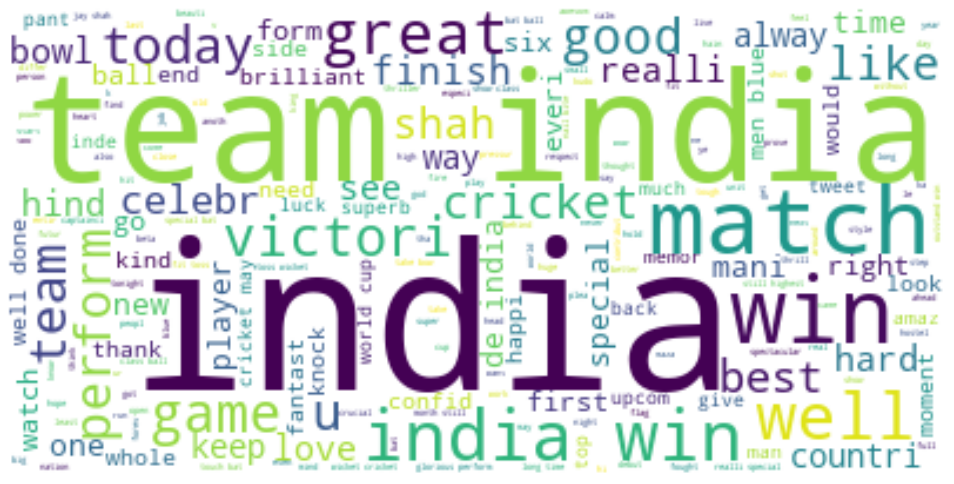

In [ ]:
text3 = " ".join(i for i in data_ind.rendered_text) # wordcloud of text in India ony tweets 

wordcloud = WordCloud(stopwords=stopword, background_color="white").generate(text3)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
sentiments = SentimentIntensityAnalyzer()  #Sentiment scoring on India tweets 
data_ind["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data_ind["rendered_text"]]
data_ind["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data_ind["rendered_text"]]
data_ind["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data_ind["rendered_text"]]
data_ind= data_ind[["rendered_text", "Positive", "Negative", "Neutral"]]


In [ ]:
d = sum(data_ind["Positive"]) # Checking tweets performance on scoring 
e = sum(data_ind["Negative"])
f = sum(data_ind["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(d, e, f)

# as below here in India we have majority tweets with neutral sentiments 

Neutral 🙂 


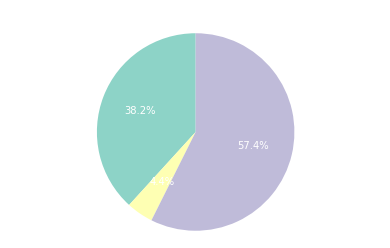

In [ ]:
pieLabels=["Winning","Loosing","Neutral"] # for visualizing Sentiment score for India tweets  

populationShare=[d,e,f]

figureObject, axesObject = plt.subplots()

axesObject.pie(populationShare,labels=pieLabels,autopct='%1.1f%%',startangle=90)
axesObject.title.set_text('INDIA SENTIMENT SCORE')

axesObject.axis('equal')

plt.show()

In [ ]:
data_ind.sample(7)
#data_pak.sample(7)

,rendered_text,Positive,Negative,Neutral
445,india ka v slow rate tum hi,0.000,0.000,1.000
2800,love edit hind,0.677,0.000,0.323
5081,great win team india well done,0.769,0.000,0.231
4721,hello meet new finish team india,0.000,0.000,1.000
4907,realli game well team india,0.344,0.000,0.656
187,pain peopl neglect true destini especi good kn...,0.572,0.211,0.217
4095,star lord mind blow game bowl bat,0.000,0.000,1.000


In [ ]:
def label_race (row): #for labelling tweets with respective sentiment score in separate column (Positive , negative , neutral)
  if row["Positive"] > row["Negative"] and  row["Positive"] > row["Neutral"] : 
    return 'Positive'
  elif row["Negative"] >  row["Positive"] and  row["Negative"] > row["Neutral"] :
    return 'Negative'
  else : #data_ind["Neutral"] > data_ind["Positive"] and  data_ind["Neutral"]  > data_ind["Negative"] :
    return 'Neutral'

data_ind['sentiment'] = data_ind.apply (lambda row: label_race(row), axis=1)
data_pak['sentiment'] = data_pak.apply (lambda row: label_race(row), axis=1)

clear_output()

In [ ]:
#data_ind.sample(7)
data_pak.sample(7)

,rendered_text,Positive,Negative,Neutral,sentiment
2309,victori pakistan great start tournament crucia...,0.508,0.000,0.492,Positive
2674,win today match pakistan happi win match shah ...,0.487,0.000,0.513,Neutral
4320,matter talent pak given like consist longev fi...,0.640,0.000,0.360,Positive
3635,win shot pak reaction ruthless,0.487,0.000,0.513,Neutral
1390,line length bowler swing best pak could come,0.375,0.000,0.625,Neutral
4217,pakistan cramp game today,0.000,0.375,0.625,Neutral
3033,big break news first reaction pak offici,0.000,0.000,1.000,Neutral


In [ ]:
data_ind = data_ind.loc[:, ['rendered_text', 'sentiment']] #selecting relevant rows for our observation 
data_ind.reset_index()
data_pak = data_pak.loc[:, ['rendered_text', 'sentiment']]
data_pak.reset_index()
data_ind.head()

,rendered_text,sentiment
2,team india great win,Positive
7,team india first win,Positive
53,one faint heart nerv fantast game well team india,Neutral
73,mind right boundari save run thi ana tha koi c...,Neutral
85,team india best reveng,Positive


In [ ]:
data_pak.sample(5)

,rendered_text,sentiment
203,v pak pakistan front fast special record know,Neutral
24,fix match pak need money victori money get mat...,Neutral
492,expert advic pakistan main avail ka stock lene,Neutral
4489,next pak game sept go well could anoth one sep...,Neutral
5231,rivalri asid new breed pakistan come good reas...,Neutral


In [ ]:
def sentiment2target(sentiment): # Labeling sentiment scores with numeric labels ( 0, 1 , 2 )  
    return {
        'Negative': 0,
        'Neutral': 1,
        'Positive' : 2
    }[sentiment]
data_ind['sentiment']=data_ind['sentiment'].map(sentiment2target)
data_pak['sentiment']=data_pak['sentiment'].map(sentiment2target)
data_ind['sentiment'].unique()




array([2, 1, 0])

In [ ]:
data_pak['sentiment'].unique()

array([1, 2, 0])

Applying vectorizer method to convert Text into numbers

In [ ]:
# Creating object of TF-IDF vectorizer
vectorizer = TfidfVectorizer(use_idf=True, lowercase=True)
X_tf_idf= vectorizer.fit_transform(data_ind.rendered_text)
X_tf_idf_PAK= vectorizer.fit_transform(data_pak.rendered_text)

Model Training

In [ ]:
def check_scores(clf,x ,y): #As our Dataset is small we are applying K-fold cross validation for training our model  

  outer_cv = KFold(n_splits=6, shuffle=True, random_state=None)
  scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score,average='macro'),
           'recall' : make_scorer(recall_score,average='macro'), 
           'f1_score' : make_scorer(f1_score,average='macro')}
  
  results= cross_validate(clf, X=x , y=y, cv=outer_cv, scoring=scoring  )

  return results


SVM Modelling


In [ ]:
# Applying SVM model and calculate evaluation metrics  
clf = OneVsRestClassifier(svm.SVC(gamma=0.01, C=100., probability=True, class_weight='balanced', kernel='linear'))
svm_scores = check_scores(clf,X_tf_idf,data_ind['sentiment'])
svm_scores_PK = check_scores(clf,X_tf_idf_PAK,data_pak['sentiment'])
clear_output()
svm_accuracy= np.mean(svm_scores['test_accuracy'])
svm_precision=np.mean(svm_scores['test_precision'])
svm_f1score= np.mean(svm_scores['test_f1_score'])
svm_recall= np.mean(svm_scores['test_recall'])

svm_accuracy_PK= np.mean(svm_scores_PK['test_accuracy'])
svm_precision_PK=np.mean(svm_scores_PK['test_precision'])
svm_f1score_PK= np.mean(svm_scores_PK['test_f1_score'])
svm_recall_PK= np.mean(svm_scores_PK['test_recall'])


######################################################
print('INDIA Sentiment Metrics')
print("accuracy score: ", np.mean(svm_scores['test_accuracy']))
print("Precision score: ", np.mean(svm_scores['test_precision'] ))
print("F1  score: ", np.mean(svm_scores['test_f1_score']))
print("Recall score: ",np.mean(svm_scores['test_recall'] ))
print('\n')

print('PAKISTAN Sentiment Metrics')
print("accuracy score: ", np.mean(svm_scores_PK['test_accuracy']))
print("Precision score: ", np.mean(svm_scores_PK['test_precision'] ))
print("F1  score: ", np.mean(svm_scores_PK['test_f1_score']))
print("Recall score: ",np.mean(svm_scores_PK['test_recall'] ))
print('\n')


INDIA Sentiment Metrics
accuracy score:  0.7848807711821411
Precision score:  0.5163562102338052
F1  score:  0.5206595842002002
Recall score:  0.5277273500116136


PAKISTAN Sentiment Metrics
accuracy score:  0.8359183673469387
Precision score:  0.6649702867675124
F1  score:  0.6265907680469734
Recall score:  0.6166878635628635




Bagging Modelling 

In [ ]:
 # Applying Bagging model and calculating evaluation metrics 
  
# bagging classifier
model = BaggingClassifier(base_estimator = MultinomialNB(),
                          n_estimators = 100)

bagging_scores= check_scores(model,X_tf_idf,data_ind['sentiment'])
bagging_scores_PK= check_scores(model,X_tf_idf_PAK,data_pak['sentiment'])

clear_output()

bag_accuracy= np.mean(bagging_scores['test_accuracy'])
bag_precision=np.mean(bagging_scores['test_precision'])
bag_f1score= np.mean(bagging_scores['test_f1_score'])
bag_recall= np.mean(bagging_scores['test_recall'])

bag_accuracy_PK= np.mean(bagging_scores_PK['test_accuracy'])
bag_precision_PK=np.mean(bagging_scores_PK['test_precision'])
bag_f1score_PK= np.mean(bagging_scores_PK['test_f1_score'])
bag_recall_PK= np.mean(bagging_scores_PK['test_recall'])

######################################################
print('INDIA Sentiment Metrics')
print("accuracy score: ", np.mean(bagging_scores['test_accuracy']))
print("Precision score: ", np.mean(bagging_scores['test_precision'] ))
print("F1  score: ", np.mean(bagging_scores['test_f1_score']))
print("Recall score: ",np.mean(bagging_scores['test_recall'] ))
print('\n')

print('PAKISTAN Sentiment Metrics')
print("accuracy score: ", np.mean(bagging_scores_PK['test_accuracy']))
print("Precision score: ", np.mean(bagging_scores_PK['test_precision'] ))
print("F1  score: ", np.mean(bagging_scores_PK['test_f1_score']))
print("Recall score: ",np.mean(bagging_scores_PK['test_recall'] ))


INDIA Sentiment Metrics
accuracy score:  0.7365867579908677
Precision score:  0.5765848893795181
F1  score:  0.5569032440263809
Recall score:  0.55794083739515


PAKISTAN Sentiment Metrics
accuracy score:  0.7414965986394558
Precision score:  0.5643320608385198
F1  score:  0.39680739119264014
Recall score:  0.42920227920227916


BOOSTING Algorithm

In [ ]:
# Applying Boosting Algorithm and calculating evaluation metrics  
boosting_scores=check_scores(AdaBoostClassifier(),X_tf_idf,data_ind['sentiment'])
boosting_scores_PK=check_scores(AdaBoostClassifier(),X_tf_idf_PAK,data_pak['sentiment'])
clear_output()

boost_accuracy= np.mean(boosting_scores['test_accuracy'])
boost_precision=np.mean(boosting_scores['test_precision'])
boost_f1score= np.mean(boosting_scores['test_f1_score'])
boost_recall= np.mean(boosting_scores['test_recall'])

boost_accuracy_PK= np.mean(boosting_scores_PK['test_accuracy'])
boost_precision_PK=np.mean(boosting_scores_PK['test_precision'])
boost_f1score_PK= np.mean(boosting_scores_PK['test_f1_score'])
boost_recall_PK= np.mean(boosting_scores_PK['test_recall'])
##################################################################
print('INDIA Sentiment Metrics')
print("accuracy score: ", np.mean(boosting_scores['test_accuracy']))
print("Precision score: ", np.mean(boosting_scores['test_precision'] ))
print("F1  score: ", np.mean(boosting_scores['test_f1_score']))
print("Recall score: ",np.mean(boosting_scores['test_recall'] ))
print('\n')

print('PAKISTAN Sentiment Metrics')
print("accuracy score: ", np.mean(boosting_scores_PK['test_accuracy']))
print("Precision score: ", np.mean(boosting_scores_PK['test_precision'] ))
print("F1  score: ", np.mean(boosting_scores_PK['test_f1_score']))
print("Recall score: ",np.mean(boosting_scores_PK['test_recall'] ))



INDIA Sentiment Metrics
accuracy score:  0.6820459157787925
Precision score:  0.4981021844357912
F1  score:  0.46171185462825376
Recall score:  0.46998664998958906


PAKISTAN Sentiment Metrics
accuracy score:  0.7447619047619048
Precision score:  0.6171324348901737
F1  score:  0.48787189012165283
Recall score:  0.48310725185725184


K MEANS 


In [ ]:
#K Means algorithm and calculating clusters 
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=256, batch_size=512, random_state=20).fit(data).inertia_)
        
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')

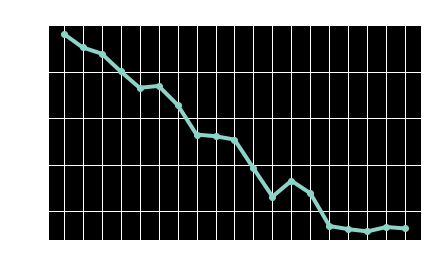

In [ ]:
find_optimal_clusters(X_tf_idf, 20)

In [ ]:
# As observed above ,and having three class targets (i.e. Positive , Negative and Neutral ) we are selecting cluster count of 3. 
num_clusters = 3

kmeans_model = MiniBatchKMeans(n_clusters=num_clusters, init='k-means++', n_init=1, 
                         init_size=1000, batch_size=1000, verbose= False, max_iter=1000) # Applying K means and calculating Evaluation metrics  
kmeans = kmeans_model.fit(X_tf_idf)
kmeans_clusters = kmeans.predict(X_tf_idf)
kmeans_distances = kmeans.transform(X_tf_idf)
sorted_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
#terms = vectorizer.get_feature_names()
#np.unique(kmeans_clusters)
kmeans_PAK = kmeans_model.fit(X_tf_idf_PAK)
kmeans_clusters_PAK = kmeans_PAK.predict(X_tf_idf_PAK)
kmeans_distances_PAK =kmeans_PAK.transform(X_tf_idf_PAK)
sorted_centroids_PAK = kmeans_PAK.cluster_centers_.argsort()[:, ::-1]
#terms = vectorizer.get_feature_names()


######
km_accuracy_ind=accuracy_score(kmeans_clusters, data_ind['sentiment'].values)
km_precision_ind=precision_score(kmeans_clusters, data_ind['sentiment'].values, average='macro')
km_recall_ind=recall_score(kmeans_clusters, data_ind['sentiment'].values, average='macro')
km_f1score_ind=f1_score(kmeans_clusters, data_ind['sentiment'].values, average='macro')

km_accuracy_pak=accuracy_score(kmeans_clusters_PAK, data_pak['sentiment'].values)
km_precision_pak=precision_score(kmeans_clusters_PAK, data_pak['sentiment'].values, average='macro')
km_recall_pak=recall_score(kmeans_clusters_PAK, data_pak['sentiment'].values, average='macro')
km_f1score_pak=f1_score(kmeans_clusters_PAK, data_pak['sentiment'].values, average='macro')

clear_output()


In [ ]:
print('INDIA Sentiment Metrics')
print("accuracy score: ", km_accuracy_ind)
print("Precision score: ", km_precision_ind)
print("F1  score: ", km_f1score_ind)
print("Recall score: ",km_recall_ind)
print('\n')

print('PAKISTAN Sentiment Metrics')
print("accuracy score: ", km_accuracy_pak)
print("Precision score: ", km_precision_pak)
print("F1  score: ", km_f1score_pak)
print("Recall score: ",km_recall_pak)

INDIA Sentiment Metrics
accuracy score:  0.2334096109839817
Precision score:  0.4103088731677995
F1  score:  0.2239678130424599
Recall score:  0.30308463212816267


PAKISTAN Sentiment Metrics
accuracy score:  0.41946308724832215
Precision score:  0.5109236557834689
F1  score:  0.3687271510046169
Recall score:  0.4930779622268984


Plotting Results 

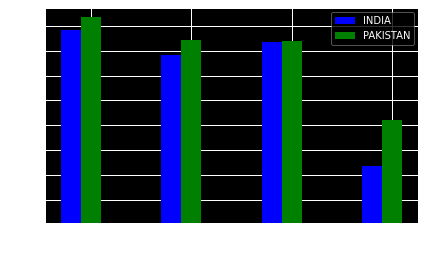

In [ ]:
x = np.arange(4)
y1 = [svm_accuracy, boost_accuracy, bag_accuracy, km_accuracy_ind] # India
y2 = [svm_accuracy_PK, boost_accuracy_PK, bag_accuracy_PK, km_accuracy_pak] # Pakistan

width = 0.2
  
# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='blue')
plt.bar(x, y2, width, color='green')
#plt.bar(x+0.2, y3, width, color='green')
plt.xticks(x, ['SVM', 'Boosting', 'Bagging', 'K-Means'])
plt.xlabel("ML Models")
plt.ylabel("Accuracy")
plt.legend(["INDIA", "PAKISTAN"])
plt.show()

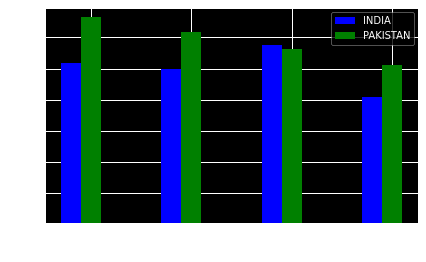

In [ ]:
x = np.arange(4)
y1 = [svm_precision, boost_precision, bag_precision, km_precision_ind] # India
y2 = [svm_precision_PK, boost_precision_PK, bag_precision_PK, km_precision_pak] # Pakistan

width = 0.2
  
# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='blue')
plt.bar(x, y2, width, color='green')
#plt.bar(x+0.2, y3, width, color='green')
plt.xticks(x, ['SVM', 'Boosting', 'Bagging', 'K-Means'])
plt.xlabel("ML Models")
plt.ylabel("Precision")
plt.legend(["INDIA", "PAKISTAN"])
plt.show()

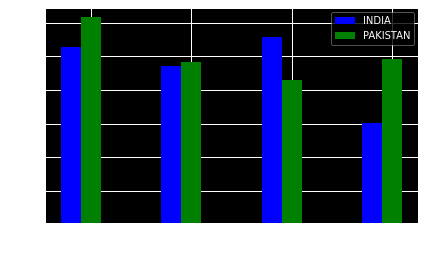

In [ ]:
x = np.arange(4)
y1 = [svm_recall, boost_recall, bag_recall, km_recall_ind] # India
y2 = [svm_recall_PK, boost_recall_PK, bag_recall_PK, km_recall_pak] # Pakistan

width = 0.2
  
# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='blue')
plt.bar(x, y2, width, color='green')
#plt.bar(x+0.2, y3, width, color='green')
plt.xticks(x, ['SVM', 'Boosting', 'Bagging', 'K-Means'])
plt.xlabel("ML Models")
plt.ylabel("Recall")
plt.legend(["INDIA", "PAKISTAN"])
#plt.style.use('seaborn-white')
plt.show()

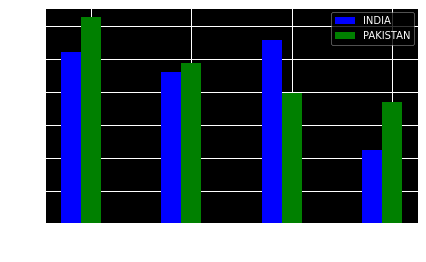

In [ ]:
x = np.arange(4)
y1 = [svm_f1score, boost_f1score, bag_f1score, km_f1score_ind] # India
y2 = [svm_f1score_PK, boost_f1score_PK, bag_f1score_PK, km_f1score_pak] # Pakistan

width = 0.2
  
# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='blue')
plt.bar(x, y2, width, color='green')
#plt.bar(x+0.2, y3, width, color='green')
plt.xticks(x, ['SVM', 'Boosting', 'Bagging', 'K-Means'])
plt.xlabel("ML Models")
plt.ylabel("F1 Score")
plt.legend(["INDIA", "PAKISTAN"])
plt.show()

By Applying different ML Algorithms , SVM is the best choice for twitter sentiment Analysis
